In [417]:
import requests
import pandas as pd
import re
from sklearn.metrics import accuracy_score
import warnings
import numpy as np

# Import dataset dari hasil TF-IDF
from google.colab import drive
drive.mount('/content/drive')

df_dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data.xlsx')
df_dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,text,Sentimen,cleansing,casefolding,steemed,normalisasi,tokenizing,tf_dict,df,df_all,idf_dict,idf_all,tf_idf_dict,tf_idf_vec
0,0,"23:29:56,""Semoga aplikasinya cepat diperbaiki,...",1,Semoga aplikasinya cepat diperbaiki kare...,semoga aplikasinya cepat diperbaiki kare...,moga aplikasi cepat baik karena begitu banyak ...,moga aplikasi cepat aplikasi aplikasi susah susah,"['moga', 'aplikasi', 'cepat', 'aplikasi', 'apl...","{'moga': 0.14285714285714285, 'aplikasi': 0.42...","{'moga': 11, 'aplikasi': 144, 'cepat': 6, 'sus...","{'moga': 11, 'aplikasi': 144, 'cepat': 6, 'sus...","{'moga': 3.036554268074246, 'aplikasi': 0.5447...","{'moga': 3.036554268074246, 'aplikasi': 0.5447...","{'moga': 0.43379346686774944, 'aplikasi': 0.23...","[0.23345450376071653, 0.0, 0.5165396717594111,..."
1,1,"23:31:43,Aplikasi apa ini nik tidak terbaca",1,Aplikasi apa ini nik tidak terbaca,aplikasi apa ini nik tidak terbaca,aplikasi apa ini nik tidak baca,aplikasi nik baca,"['aplikasi', 'nik', 'baca']","{'aplikasi': 0.3333333333333333, 'nik': 0.3333...","{'aplikasi': 144, 'nik': 8, 'baca': 3}","{'moga': 11, 'aplikasi': 144, 'cepat': 6, 'sus...","{'aplikasi': 0.5447271754416719, 'nik': 3.3242...","{'moga': 3.036554268074246, 'aplikasi': 0.5447...","{'aplikasi': 0.18157572514722398, 'nik': 1.108...","[0.18157572514722398, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2,"23:41:43,Entah lah susah di jelaskan....ribeet…",0,Entah lah susah di jelaskanribeet,entah lah susah di jelaskanribeet,entah lah susah di jelaskanribeet,susah jelaskanribeet,"['susah', 'jelaskanribeet']","{'susah': 0.5, 'jelaskanribeet': 0.5}","{'susah': 40, 'jelaskanribeet': 1}","{'moga': 11, 'aplikasi': 144, 'cepat': 6, 'sus...","{'susah': 1.8078888511579387, 'jelaskanribeet'...","{'moga': 3.036554268074246, 'aplikasi': 0.5447...","{'susah': 0.9039444255789694, 'jelaskanribeet'...","[0.0, 0.0, 0.9039444255789694, 0.0, 0.0, 0.0, ..."
3,3,"23:45:23,Selevel negara kok tidak mampu bikin ...",0,Selevel negara kok tidak mampu bikin apl...,selevel negara kok tidak mampu bikin apl...,level negara kok tidak mampu bikin aplikasi ya...,level negara aplikasi daftar ulang login no hp...,"['level', 'negara', 'aplikasi', 'daftar', 'ula...","{'level': 0.06666666666666667, 'negara': 0.133...","{'aplikasi': 144, 'level': 1, 'negara': 3, 'da...","{'moga': 11, 'aplikasi': 144, 'cepat': 6, 'sus...","{'aplikasi': 0.5447271754416719, 'level': 4.82...","{'moga': 3.036554268074246, 'aplikasi': 0.5447...","{'level': 0.3218875824868201, 'negara': 0.5513...","[0.036315145029444794, 0.08115972164387178, 0...."
4,4,"00:00:53,""Maaf kasih 1 bintang karena engga e...",0,Maaf kasih bintang karena engga epekti...,maaf kasih bintang karena engga epekti...,maaf kasih bintang karena engga epektif malah ...,maaf kasih bintang engga epektif ribet daftar ...,"['maaf', 'kasih', 'bintang', 'engga', 'epektif...","{'maaf': 0.125, 'kasih': 0.125, 'bintang': 0.1...","{'susah': 40, 'daftar': 73, 'maaf': 1, 'kasih'...","{'moga': 11, 'aplikasi': 144, 'cepat': 6, 'sus...","{'susah': 1.8078888511579387, 'daftar': 1.2173...","{'moga': 3.036554268074246, 'aplikasi': 0.5447...","{'maaf': 0.6035392171627877, 'kasih': 0.343609...","[0.0, 0.1521744780822596, 0.22598610639474234,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,"Setelah hampir sehari mengisi data diri,di sub...",1,Setelah hampir sehari mengisi data diridi subs...,setelah hampir sehari mengisi data diridi subs...,telah hampir hari isi data ridi subsidi tepat ...,isi data ridi subsidi sasaranpilihan simpan dn...,"['isi', 'data', 'ridi', 'subsidi', 'sasaranpil...","{'isi': 0.1111111111111111, 'data': 0.11111111...","{'simpan': 4, 'subsidi': 25, 'tolong': 8, 'isi...","{'moga': 11, 'aplikasi': 144, 'cepat': 6, 'sus...","{'simpan': 3.912023005428146, 'subsidi': 2.263...","{'moga': 3.036554268074246, 'aplikasi': 0.5447...","{'isi': 0.24729156131754637, 'data': 0.2355848...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23558483..."
246,246,Dengan aplikasi MyPertamina👍👍

In [418]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [419]:
# Jadikan sentimen (nilai y) menjadi nilai 0 dan 1

enc = LabelEncoder()
df_dataset['Sentimen'] = enc.fit_transform(df_dataset['Sentimen'].values)
cls = df_dataset['Sentimen']
cls

0      1
1      1
2      0
3      0
4      0
      ..
245    1
246    1
247    0
248    1
249    0
Name: Sentimen, Length: 250, dtype: int64

In [420]:
# Tetapkan nilai X dari hasil TF-IDF 

attrs = df_dataset['tf_idf_vec']
attrs

0      [0.23345450376071653, 0.0, 0.5165396717594111,...
1      [0.18157572514722398, 0.0, 0.0, 0.0, 0.0, 0.0,...
2      [0.0, 0.0, 0.9039444255789694, 0.0, 0.0, 0.0, ...
3      [0.036315145029444794, 0.08115972164387178, 0....
4      [0.0, 0.1521744780822596, 0.22598610639474234,...
                             ...                        
245    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23558483...
246    [0.27236358772083596, 0.0, 0.0, 0.0, 0.0, 0.0,...
247    [0.13618179386041798, 0.0, 0.0, 0.0, 0.0, 0.0,...
248    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3533772560333...
249    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: tf_idf_vec, Length: 250, dtype: object

In [421]:
# Jadikan nilai x menjadi dataframe
import ast
for i in range(len(attrs)):
    attrs[i] = ast.literal_eval(attrs[i])

column_name = []
dataset = []

for i in range(len(attrs[0])):
    column_name.append("X"+str(i))

for i in range(len(attrs)):
    dataset.append(attrs[i])

attr = pd.DataFrame(dataset, columns=column_name)
attr

<ipython-input-421-c3bd5cb043e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrs[i] = ast.literal_eval(attrs[i])


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74
0,0.233455,0.000000,0.516540,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.181576,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.000000,0.000000,0.903944,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.036315,0.081160,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.152174,0.225986,0.0,0.0,0.0,0.000000,0.000000,0.0,0.278203,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.235585,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
246,0.272364,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
247,0.136182,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.893888,0.0,0.0,0.0,0.000000
248,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.353377,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.595925


In [422]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

# Proses K-FOLDING
kf = KFold(n_splits=5)
kf.get_n_splits(attr)
x_train_data = [0,0,0,0,0]
x_test_data = [0,0,0,0,0]
y_train_data = [0,0,0,0,0]
y_test_data = [0,0,0,0,0]
for i, (train_index, test_index) in enumerate(kf.split(attr)):
    # x_train, x_test, y_train, y_test = train_test_split(attr, cls, test_size = 0.2)
    x_train , x_test = attr.iloc[train_index,:],attr.iloc[test_index,:]
    y_train , y_test = cls[train_index] , cls[test_index]

    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    tree = SVC()
    tree.fit(x_train, y_train)

    x_train_data[i] = x_train
    x_test_data[i] = x_test
    y_train_data[i] = y_train
    y_test_data[i] = y_test

In [423]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

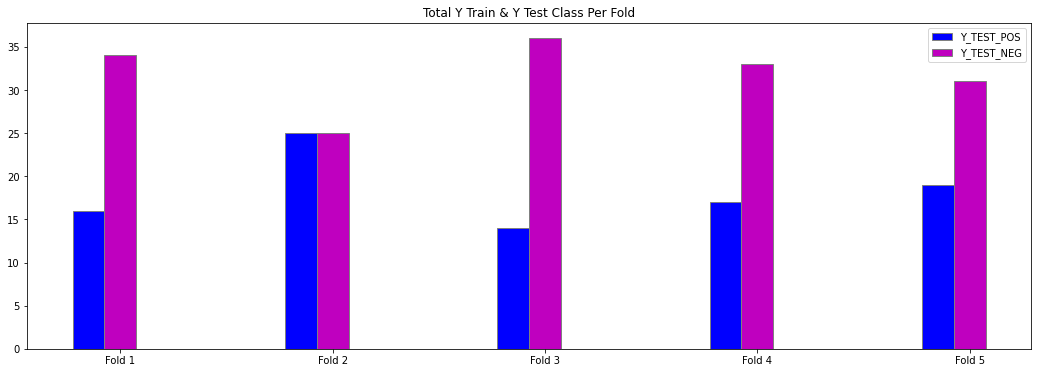

In [424]:
# PLot nilai Y test per fold

fig = plt.subplots(figsize=(18,6))
barWidth = 0.15
Y_TEST_POS = [sum(p == 1 for p in y_test_data[0]), sum(p == 1 for p in y_test_data[1]), sum(p == 1 for p in y_test_data[2]), sum(p == 1 for p in y_test_data[3]), sum(p == 1 for p in y_test_data[4])]
Y_TEST_NEG = [sum(p == 0 for p in y_test_data[0]), sum(p == 0 for p in y_test_data[1]), sum(p == 0 for p in y_test_data[2]), sum(p == 0 for p in y_test_data[3]), sum(p == 0 for p in y_test_data[4])]

br1 = np.arange(len(Y_TEST_POS))
br2 = [x + barWidth for x in br1]

plt.title("Total Y Train & Y Test Class Per Fold")
plt.bar(br1, Y_TEST_POS, color ='b', width = barWidth,
        edgecolor ='grey', label ='Y_TEST_POS')
plt.bar(br2, Y_TEST_NEG, color ='m', width = barWidth,
        edgecolor ='grey', label ='Y_TEST_NEG')

plt.xticks([r + barWidth for r in range(len(Y_TEST_POS))],
        ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"])
 
plt.legend()
plt.show()

In [425]:
# Parameter SVM

c_data = 1.0
max_iteration = 5000
tolerance = 0.001
np.random.seed(100)

Accuration:  80.0 %
Precission:  87.5 %
Recall:  43.75 %
F1 Score:  58.333333333333336 %


Text(69.0, 0.5, 'Truth')

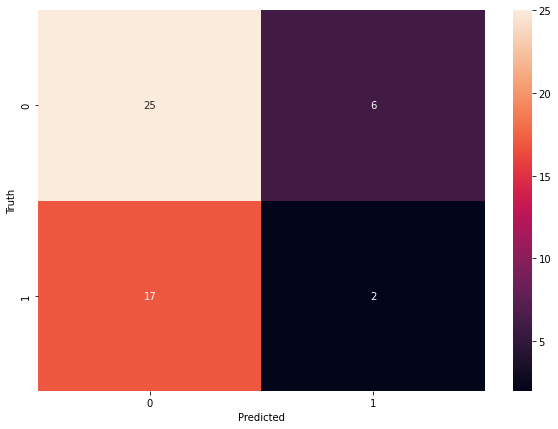

In [426]:
# Proses training FOLD-1

fold_1 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-1
fold_1 = fold_1.fit(x_train_data[0], y_train_data[0])

prediction_1 = fold_1.predict(x_test_data[0])
false_1 = (prediction_1 != y_test_data[0]).sum()
true_1 = (prediction_1 == y_test_data[0]).sum()
tn_1, fp_1, fn_1, tp_1 = confusion_matrix(y_test_data[0], prediction_1).ravel()
precision_score_1 = tp_1 / (tp_1 + fp_1)
recall_score_1 = tp_1 / (tp_1 + fn_1)
f1_score_1 = 2 * (recall_score_1 * precision_score_1) / (recall_score_1 + precision_score_1)

# Hasil Akurasi
print("Accuration: ", true_1 / (true_1 + false_1) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_1 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_1 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_1 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_1 = confusion_matrix(y_test, prediction_1)
plt.figure(figsize=(10,7))
sn.heatmap(cm_1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  64.0 %
Precission:  73.33333333333333 %
Recall:  44.0 %
F1 Score:  54.99999999999999 %


Text(69.0, 0.5, 'Truth')

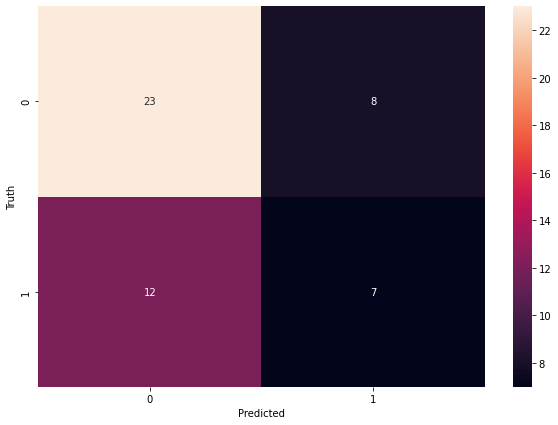

In [427]:
# Proses training FOLD-2

fold_2 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-2
fold_2 = fold_2.fit(x_train_data[1], y_train_data[1])

prediction_2 = fold_2.predict(x_test_data[1])
false_2 = (prediction_2 != y_test_data[1]).sum()
true_2 = (prediction_2 == y_test_data[1]).sum()
tn_2, fp_2, fn_2, tp_2 = confusion_matrix(y_test_data[1], prediction_2).ravel()
precision_score_2 = tp_2 / (tp_2 + fp_2)
recall_score_2 = tp_2 / (tp_2 + fn_2)
f1_score_2 = 2 * (recall_score_2 * precision_score_2) / (recall_score_2 + precision_score_2)

# Hasil Akurasi
print("Accuration: ", true_2 / (true_2 + false_2) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_2 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_2 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_2 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_2 = confusion_matrix(y_test, prediction_2)
plt.figure(figsize=(10,7))
sn.heatmap(cm_2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  80.0 %
Precission:  64.28571428571429 %
Recall:  64.28571428571429 %
F1 Score:  64.28571428571429 %


Text(69.0, 0.5, 'Truth')

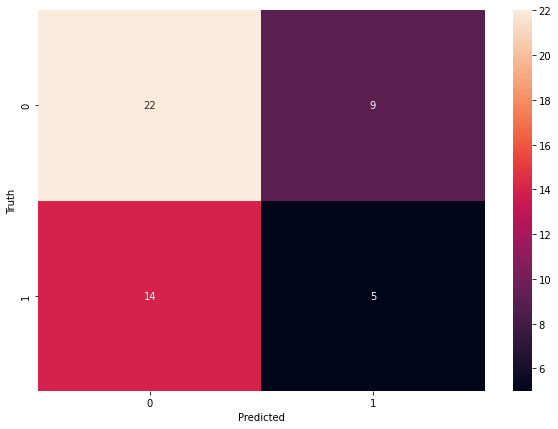

In [428]:
# Proses training FOLD-3

fold_3 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-3
fold_3 = fold_3.fit(x_train_data[2], y_train_data[2])

prediction_3 = fold_3.predict(x_test_data[2])
false_3 = (prediction_3 != y_test_data[2]).sum()
true_3 = (prediction_3 == y_test_data[2]).sum()
tn_3, fp_3, fn_3, tp_3 = confusion_matrix(y_test_data[2], prediction_3).ravel()
precision_score_3 = tp_3 / (tp_3 + fp_3)
recall_score_3 = tp_3 / (tp_3 + fn_3)
f1_score_3 = 2 * (recall_score_3 * precision_score_3) / (recall_score_3 + precision_score_3)

# Hasil Akurasi
print("Accuration: ", true_3 / (true_3 + false_3) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_3 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_3 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_3 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_3 = confusion_matrix(y_test, prediction_3)
plt.figure(figsize=(10,7))
sn.heatmap(cm_3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  74.0 %
Precission:  75.0 %
Recall:  35.294117647058826 %
F1 Score:  48.0 %


Text(69.0, 0.5, 'Truth')

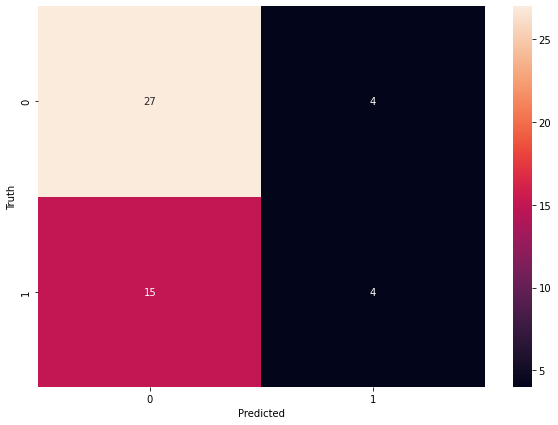

In [429]:
# Proses training FOLD-4

fold_4 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-4
fold_4 = fold_4.fit(x_train_data[3], y_train_data[3])

prediction_4 = fold_4.predict(x_test_data[3])
false_4 = (prediction_4 != y_test_data[3]).sum()
true_4 = (prediction_4 == y_test_data[3]).sum()
tn_4, fp_4, fn_4, tp_4 = confusion_matrix(y_test_data[3], prediction_4).ravel()
precision_score_4 = tp_4 / (tp_4 + fp_4)
recall_score_4 = tp_4 / (tp_4 + fn_4)
f1_score_4 = 2 * (recall_score_4 * precision_score_4) / (recall_score_4 + precision_score_4)

# Hasil Akurasi
print("Accuration: ", true_4 / (true_4 + false_4) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_4 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_4 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_4 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_4 = confusion_matrix(y_test, prediction_4)
plt.figure(figsize=(10,7))
sn.heatmap(cm_4, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  74.0 %
Precission:  75.0 %
Recall:  47.368421052631575 %
F1 Score:  58.06451612903226 %


Text(69.0, 0.5, 'Truth')

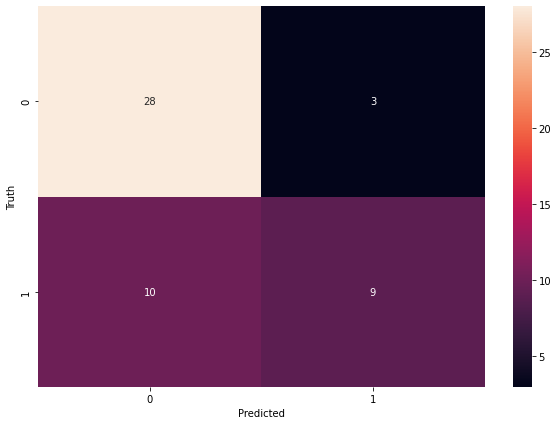

In [430]:
# Proses training FOLD-5

fold_5 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-5
fold_5 = fold_5.fit(x_train_data[4], y_train_data[4])

prediction_5 = fold_5.predict(x_test_data[4])
false_5 = (prediction_5 != y_test_data[4]).sum()
true_5 = (prediction_5 == y_test_data[4]).sum()
tn_5, fp_5, fn_5, tp_5 = confusion_matrix(y_test_data[4], prediction_5).ravel()
precision_score_5 = tp_5 / (tp_5 + fp_5)
recall_score_5 = tp_5 / (tp_5 + fn_5)
f1_score_5 = 2 * (recall_score_5 * precision_score_5) / (recall_score_5 + precision_score_5)

# Hasil Akurasi
print("Accuration: ", true_5 / (true_5 + false_5) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_5 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_5 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_5 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_5 = confusion_matrix(y_test, prediction_5)
plt.figure(figsize=(10,7))
sn.heatmap(cm_5, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

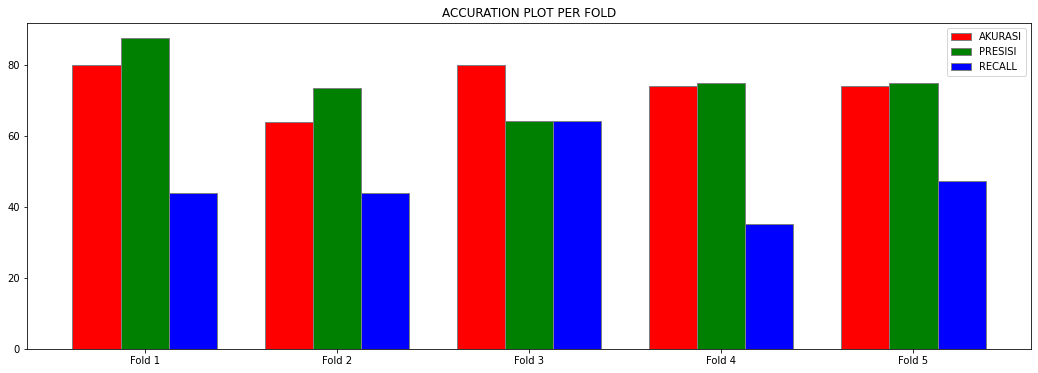

In [431]:
fig = plt.subplots(figsize=(18,6))
barWidth = 0.25
ACCURACY = [(true_1 / (true_1 + false_1) * 100), (true_2 / (true_2 + false_2) * 100), (true_3 / (true_3 + false_3) * 100), (true_4 / (true_4 + false_4) * 100), (true_5 / (true_5 + false_5) * 100)]
PRECISION = [precision_score_1 * 100, precision_score_2 * 100, precision_score_3 * 100, precision_score_4 * 100, precision_score_5 * 100]
RECALL = [recall_score_1 * 100, recall_score_2 * 100, recall_score_3 * 100, recall_score_4 * 100, recall_score_5 * 100]
 
br1 = np.arange(len(ACCURACY))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.title("ACCURATION PLOT PER FOLD")
plt.bar(br1, ACCURACY, color ='r', width = barWidth,
        edgecolor ='grey', label ='AKURASI')
plt.bar(br2, PRECISION, color ='g', width = barWidth,
        edgecolor ='grey', label ='PRESISI')
plt.bar(br3, RECALL, color ='b', width = barWidth,
        edgecolor ='grey', label ='RECALL')

plt.xticks([r + barWidth for r in range(len(ACCURACY))],
    ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"])
 
plt.legend()
plt.show()

Akurasi 74.4 %
Presisi 75.02380952380952 %
Recall 46.939650597080934 %


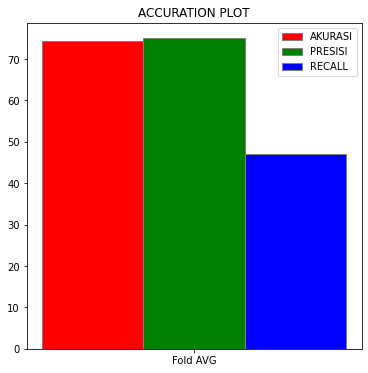

In [432]:
def get_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg

acc_avg = get_average(ACCURACY)
pre_avg = get_average(PRECISION)
rec_avg = get_average(RECALL)

print('Akurasi', acc_avg, '%')
print('Presisi', pre_avg, '%')
print('Recall', rec_avg, '%')

fig = plt.subplots(figsize=(6,6))
barWidth = 0.1
 
br1 = np.arange(len([acc_avg]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.title("ACCURATION PLOT")
plt.bar(br1, [acc_avg], color ='r', width = barWidth,
        edgecolor ='grey', label ='AKURASI')
plt.bar(br2, [pre_avg], color ='g', width = barWidth,
        edgecolor ='grey', label ='PRESISI')
plt.bar(br3, [rec_avg], color ='b', width = barWidth,
        edgecolor ='grey', label ='RECALL')

plt.xticks([r + barWidth for r in range(len([acc_avg]))],
    ["Fold AVG"])
 
plt.legend()
plt.show()